# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [6]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [12]:
pd.DataFrame(app_train.corr()['TARGET']).rank(axis=0, na_option="top", ascending=True)

,TARGET
SK_ID_CURR,70.0
TARGET,110.0
NAME_CONTRACT_TYPE,20.0
FLAG_OWN_CAR,37.0
FLAG_OWN_REALTY,62.0
CNT_CHILDREN,93.0
AMT_INCOME_TOTAL,65.0
AMT_CREDIT,22.0
AMT_ANNUITY,47.0
AMT_GOODS_PRICE,9.0


In [14]:
data = app_train.corr()
data.sort_values('TARGET', inplace = True) 

In [17]:
data.head(15) 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
EXT_SOURCE_3,0.000222,-0.178919,-0.005762,-0.015503,0.040281,-0.042710,-0.030229,0.043516,0.030752,0.047717,...,-0.002590,-0.013837,-0.013058,-0.001193,-0.007190,-0.021258,-0.007856,-0.025131,-0.071449,0.115263
EXT_SOURCE_2,0.002342,-0.160472,0.015964,0.053814,0.002576,-0.018015,0.060925,0.131228,0.125804,0.139367,...,0.003256,0.000614,-0.007236,-0.004077,0.000553,0.001507,0.051981,-0.002849,-0.021984,-0.019508
EXT_SOURCE_1,0.000082,-0.155317,-0.013736,-0.058483,0.080234,-0.138470,0.026232,0.168429,0.119398,0.175502,...,0.005131,-0.005102,-0.019208,-0.003963,-0.005087,-0.001801,0.030820,-0.003631,0.006562,0.294291
DAYS_BIRTH,0.001500,-0.078239,-0.086364,-0.129879,0.119146,-0.330938,-0.027261,0.055436,-0.009445,0.053442,...,-0.003614,-0.009015,-0.027282,-0.005285,-0.002255,0.001336,-0.001372,0.011799,0.071983,0.619947
DAYS_EMPLOYED_ANOM,0.001368,-0.045987,-0.054967,-0.154778,0.070107,-0.240722,-0.064038,-0.065594,-0.103608,-0.063569,...,-0.010047,-0.010182,-0.008578,-0.004729,0.000444,0.003043,-0.034111,0.015252,0.050001,1.000000
FLOORSMAX_AVG,0.004851,-0.044003,0.025687,0.047174,0.004989,-0.009705,0.060171,0.103296,0.130174,0.108512,...,0.000900,-0.002702,-0.005814,0.003101,0.002946,-0.000050,0.046762,-0.000841,-0.019750,-0.016038
FLOORSMAX_MEDI,0.004588,-0.043768,0.025363,0.047162,0.005161,-0.009447,0.059682,0.102770,0.129179,0.107936,...,0.000879,-0.002662,-0.005831,0.003301,0.002752,0.000082,0.045992,-0.000724,-0.019865,-0.016118
FLOORSMAX_MODE,0.004386,-0.043226,0.024052,0.046389,0.006630,-0.009550,0.057675,0.100418,0.126302,0.105532,...,0.000908,-0.002362,-0.005814,0.003470,0.002535,0.000317,0.044121,-0.000361,-0.019111,-0.015121
AMT_GOODS_PRICE,-0.000232,-0.039645,-0.185850,0.120310,-0.045537,-0.001827,0.159610,0.986968,0.775109,1.000000,...,0.020279,0.031640,-0.014486,-0.003237,0.004677,-0.001007,0.056422,0.016432,-0.050998,-0.063569
REGION_POPULATION_RELATIVE,0.000849,-0.037227,0.026867,0.041314,0.015175,-0.025573,0.074796,0.099738,0.118429,0.103520,...,0.002364,-0.000045,0.003437,-0.002225,0.001399,-0.002149,0.078607,-0.001279,0.001003,-0.004037


In [34]:
dataDesc = data.sort_values('TARGET', ascending=False) 
dataDesc.head(15) 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
TARGET,-0.002108,1.000000,-0.030896,-0.021851,-0.006148,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,...,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930,-0.045987
DAYS_EMPLOYED,-0.000084,0.074958,0.036388,0.023096,-0.030665,0.061145,-0.013005,-0.091295,-0.053604,-0.093374,...,0.000449,0.003042,0.012101,-0.000477,0.002090,0.002171,-0.024433,0.006567,-0.000527,NaN
REGION_RATING_CLIENT_W_CITY,-0.001138,0.060893,-0.023116,-0.021405,0.001884,0.024781,-0.091735,-0.110915,-0.141682,-0.112208,...,-0.001530,0.002609,-0.001501,0.006239,-0.001953,0.001102,-0.067741,0.004773,0.010683,0.034755
REGION_RATING_CLIENT,-0.001075,0.058899,-0.021593,-0.022668,0.001289,0.025423,-0.085465,-0.101776,-0.128525,-0.103786,...,-0.001205,0.002217,-0.001887,0.006312,-0.002241,0.001683,-0.069712,0.005436,0.011494,0.032901
DAYS_LAST_PHONE_CHANGE,-0.000858,0.055218,0.061830,-0.039091,0.027019,-0.005865,-0.018585,-0.073701,-0.063747,-0.076313,...,0.006852,0.009171,0.009826,-0.000858,0.002337,-0.003495,-0.041244,-0.001451,-0.112725,0.021111
DAYS_ID_PUBLISH,-0.000384,0.051457,0.052847,0.013661,0.006664,-0.028019,0.008506,-0.006575,0.011268,-0.009267,...,0.000903,0.000070,0.017246,0.004761,-0.000999,-0.001249,-0.009660,-0.006200,-0.035099,-0.273633
REG_CITY_NOT_WORK_CITY,-0.001582,0.050994,0.004487,0.076081,-0.061889,0.070650,0.006431,-0.018856,0.000896,-0.020333,...,-0.003854,0.000703,0.003487,0.000481,-0.001982,-0.002753,-0.012182,-0.005227,-0.008013,-0.256454
FLAG_EMP_PHONE,-0.001337,0.045982,0.054938,0.154659,-0.070021,0.240714,0.063994,0.065519,0.103533,0.063487,...,0.010049,0.010183,0.008579,0.004619,-0.000438,-0.003028,0.034092,-0.015271,-0.049949,-0.999868
REG_CITY_NOT_LIVE_CITY,-0.001885,0.044395,0.013586,0.003123,-0.061709,0.020072,0.003574,-0.026886,-0.006214,-0.027212,...,-0.005119,-0.001181,0.002614,0.000549,-0.002152,-0.001517,-0.010881,0.000933,-0.004793,-0.092175
FLAG_DOCUMENT_3,-0.003411,0.044346,-0.479724,-0.070000,-0.036839,0.056837,-0.016751,0.096365,0.102843,0.074900,...,0.009423,0.007396,-0.025510,-0.000761,0.000982,0.008175,0.010360,0.009576,0.048214,-0.248508


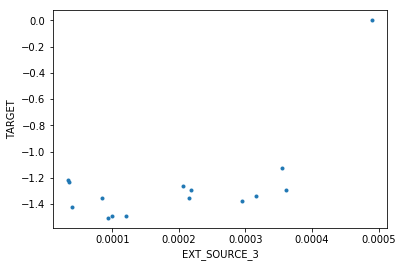

Correlation: 0.6322


In [39]:
sub_df = dataDesc.head(15) 
# 通常可以對數值範圍較大的取 log: 發現雖然沒有相關，但是受雇越久的人，AMT_INCOME_TOTAL 的 variance 越小
plt.plot(sub_df['EXT_SOURCE_3'] / (-365), np.log10(sub_df['TARGET'] ), '.')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('TARGET')
plt.show()
corr = np.corrcoef(sub_df['EXT_SOURCE_3'] / (-365), np.log10(sub_df['TARGET']))
print("Correlation: %.4f" % (corr[0][1]))

C:\Users\jamie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


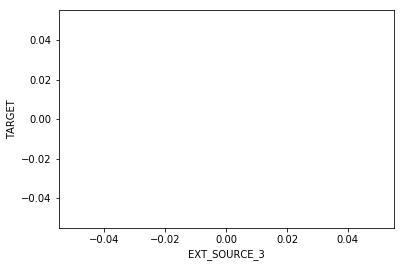

Correlation: nan


C:\Users\jamie\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys


In [45]:
sub_df = data.sort_values('TARGET', ascending=True).head(15) 
# 通常可以對數值範圍較大的取 log: 發現雖然沒有相關，但是受雇越久的人，AMT_INCOME_TOTAL 的 variance 越小
plt.plot(sub_df['EXT_SOURCE_3'] / (-365), np.log10(sub_df['TARGET'] ), '.')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('TARGET')
plt.show()
corr = np.corrcoef(sub_df['EXT_SOURCE_3'] / (-365), np.log10(sub_df['TARGET']))
print("Correlation: %.4f" % (corr[0][1]))

In [46]:
sub_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
EXT_SOURCE_3,0.000222,-0.178919,-0.005762,-0.015503,0.040281,-0.042710,-0.030229,0.043516,0.030752,0.047717,...,-0.002590,-0.013837,-0.013058,-0.001193,-0.007190,-0.021258,-0.007856,-0.025131,-0.071449,0.115263
EXT_SOURCE_2,0.002342,-0.160472,0.015964,0.053814,0.002576,-0.018015,0.060925,0.131228,0.125804,0.139367,...,0.003256,0.000614,-0.007236,-0.004077,0.000553,0.001507,0.051981,-0.002849,-0.021984,-0.019508
EXT_SOURCE_1,0.000082,-0.155317,-0.013736,-0.058483,0.080234,-0.138470,0.026232,0.168429,0.119398,0.175502,...,0.005131,-0.005102,-0.019208,-0.003963,-0.005087,-0.001801,0.030820,-0.003631,0.006562,0.294291
DAYS_BIRTH,0.001500,-0.078239,-0.086364,-0.129879,0.119146,-0.330938,-0.027261,0.055436,-0.009445,0.053442,...,-0.003614,-0.009015,-0.027282,-0.005285,-0.002255,0.001336,-0.001372,0.011799,0.071983,0.619947
DAYS_EMPLOYED_ANOM,0.001368,-0.045987,-0.054967,-0.154778,0.070107,-0.240722,-0.064038,-0.065594,-0.103608,-0.063569,...,-0.010047,-0.010182,-0.008578,-0.004729,0.000444,0.003043,-0.034111,0.015252,0.050001,1.000000
FLOORSMAX_AVG,0.004851,-0.044003,0.025687,0.047174,0.004989,-0.009705,0.060171,0.103296,0.130174,0.108512,...,0.000900,-0.002702,-0.005814,0.003101,0.002946,-0.000050,0.046762,-0.000841,-0.019750,-0.016038
FLOORSMAX_MEDI,0.004588,-0.043768,0.025363,0.047162,0.005161,-0.009447,0.059682,0.102770,0.129179,0.107936,...,0.000879,-0.002662,-0.005831,0.003301,0.002752,0.000082,0.045992,-0.000724,-0.019865,-0.016118
FLOORSMAX_MODE,0.004386,-0.043226,0.024052,0.046389,0.006630,-0.009550,0.057675,0.100418,0.126302,0.105532,...,0.000908,-0.002362,-0.005814,0.003470,0.002535,0.000317,0.044121,-0.000361,-0.019111,-0.015121
AMT_GOODS_PRICE,-0.000232,-0.039645,-0.185850,0.120310,-0.045537,-0.001827,0.159610,0.986968,0.775109,1.000000,...,0.020279,0.031640,-0.014486,-0.003237,0.004677,-0.001007,0.056422,0.016432,-0.050998,-0.063569
REGION_POPULATION_RELATIVE,0.000849,-0.037227,0.026867,0.041314,0.015175,-0.025573,0.074796,0.099738,0.118429,0.103520,...,0.002364,-0.000045,0.003437,-0.002225,0.001399,-0.002149,0.078607,-0.001279,0.001003,-0.004037
